Name: Rohini Kokare
MIS No: 812203003

1. Plot simple Sigmoid Neuron Function using matplotlib or seaborn python libraries
2. Plot a 2-D Contour plot for dummny values of X and Y
3. Plot a 3-D Contour plot for dummny values of X and Y
4. Train SigmoidNeuron Model on the dummy TOY dataset and do contour plotting
5. Run the SigmoidNeuron Model on any dataset of your choice.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import seaborn as sn
from sklearn.utils import resample

In [2]:
dataset = pd.read_csv('social_network_ads.csv')

In [3]:
dataset

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [4]:
def sigmoid(x):
    return 1/(1 + np.exp(-x))

In [5]:
x = np.linspace(-10, 10, 30)
y = np.linspace(-10, 10, 30)

In [6]:
print(x)

[-10.          -9.31034483  -8.62068966  -7.93103448  -7.24137931
  -6.55172414  -5.86206897  -5.17241379  -4.48275862  -3.79310345
  -3.10344828  -2.4137931   -1.72413793  -1.03448276  -0.34482759
   0.34482759   1.03448276   1.72413793   2.4137931    3.10344828
   3.79310345   4.48275862   5.17241379   5.86206897   6.55172414
   7.24137931   7.93103448   8.62068966   9.31034483  10.        ]


In [7]:
X, Y = np.meshgrid(x, y)

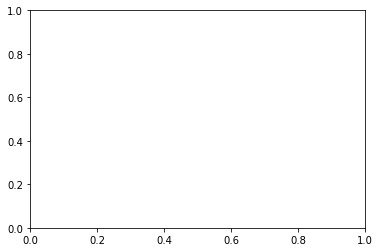

In [8]:
a,b = plt.subplots(1,1)

In [9]:
def f(x, y):
       return x**2 + y **2

In [10]:
Z = f(X, Y)

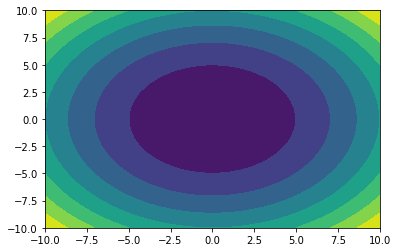

In [11]:
plt.contourf(X, Y, Z)

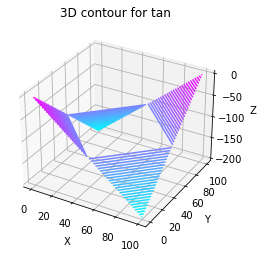

In [12]:
from mpl_toolkits import mplot3d
from matplotlib import cm
import math

x = [i for i in range(0, 200, 100)]
y = [i for i in range(0, 200, 100)]

X, Y = np.meshgrid(x, y)
Z = []
for i in x:
    t = []
    for j in y:
        t.append(math.tan(math.sqrt(i*2+j*2)))
    Z.append(t)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap=cm.cool)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('3D contour for tan')
plt.show()

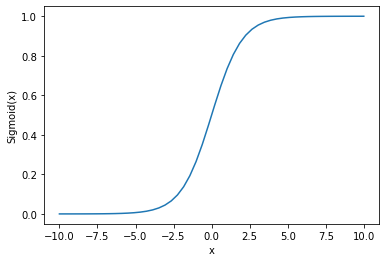

In [13]:
x = np.linspace(-10, 10, 50)   
p = sigmoid(x)
plt.xlabel("x") 
plt.ylabel("Sigmoid(x)")  
plt.plot(x, p) 
plt.show()

In [14]:
class Sigmoid_Neuron:
    def __init__(self, learning_rate=0.01, iterations = 1000):
        self.learning_rate = learning_rate
        self.iters = iterations
        self.bias = None  
        self.errorPerItr = None
        self.weight = None
        
    def predict_values(self, valuea):
        y_pred = []
        for i in range(len(valuea)):
            x=valuea.iloc[i]
            weighted_input = np.dot(x, self.weight) + self.bias  # weighted input + bias
            y_predicted = self.sigmoid_function(weighted_input)  # applying sigmoid function to weighted input
            y_pred.append(y_predicted)
        return y_pred
    
    def sigmoid_function(self,t):
        return 1.0/(1.0 + np.exp(-t))
    
    def GD_algorithm(self, valuea, valueb):
        self.bias = 0
        n_features = valuea.shape[1]
        self.weight = np.zeros(n_features)
        
        #ensure that y is 0 or 1
        y = np.array([1 if i>0 else 0 for i in valueb])
        
        self.errorPerItr = []        
        #we assume that sigmoid model will converge in finite iterations
        for itr in range(self.iters):
            grad_weight = 0
            grad_bias = 0
            loss = 0
            for i in range(len(valuea)):
                x=valuea.iloc[i]
                linear_output = np.dot(x, self.weight) + self.bias 
                y_predicted = self.sigmoid_function(linear_output)
                fx = y_predicted
                
                y= valueb.iloc[i]
                grad_weight += (fx - y)*fx*(1-fx)*np.dot(np.ones(n_features), x)
                grad_bias += (fx - y)*fx*(1-fx)
                
                #for each epoch we will calculate the loss
                loss += (fx - y)**2
            self.errorPerItr.append(0.5 * loss) #0.5 is justfor convenience
            print("Loss: ", 0.5 * loss)
            
            #calculate new W and b
            for i in range(n_features): # since W is a vector
                self.weight[i] -= self.learning_rate*grad_weight
            self.bias -= self.learning_rate*grad_bias    # b is a scalar
            print("weights: ", self.weight)
            print("Bias: ", self.bias)

In [15]:
dataset

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]

In [20]:
# Replace Gender dataframe by 1 if it is Male otherwise 0
dataset['Gender'] = dataset['Gender'].replace(to_replace='Female', value=0)
dataset['Gender'] = dataset['Gender'].replace(to_replace='Male', value=1)

In [21]:
dataset['Gender'].value_counts()

0    204
1    196
Name: Gender, dtype: int64

In [22]:
dataset['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [23]:
dataset

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863       0   46            41000          1
396  15706071       1   51            23000          1
397  15654296       0   50            20000          1
398  15755018       1   36            33000          0
399  15594041       0   49            36000          1

[400 rows x 5 columns]

In [24]:
# balancing the dataset by reducing records of class 0
class_0 = dataset[dataset.Purchased!=1]
class_0

User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510       1   19            19000          0
1    15810944       1   35            20000          0
2    15668575       0   26            43000          0
3    15603246       0   27            57000          0
4    15804002       1   19            76000          0
..        ...     ...  ...              ...        ...
377  15800215       0   42            53000          0
380  15683758       1   42            64000          0
387  15627220       1   39            71000          0
394  15757632       0   39            59000          0
398  15755018       1   36            33000          0

[257 rows x 5 columns]

In [26]:
class_1 = dataset[dataset.Purchased!=0]
class_1["Purchased"].value_counts()

1    143
Name: Purchased, dtype: int64

In [27]:
class_0 = class_0.loc[0:12139]
class_0["Purchased"].value_counts()

0    257
Name: Purchased, dtype: int64

In [28]:
frames = [class_0, class_1]
  
balanced_data = pd.concat(frames)
display(balanced_data["Purchased"].value_counts())
display(balanced_data.shape)

0    257
1    143
Name: Purchased, dtype: int64

(400, 5)

In [29]:
# split training and test data
from sklearn.model_selection import train_test_split
x = balanced_data.drop("Purchased", axis = 1)
y = balanced_data["Purchased"]
display(x)
display(y)
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.9,test_size = 0.1, stratify = y)
print("X ",x.shape,x_train.shape, x_test.shape)
print("Y means: ",y.mean(),y_train.mean(), y_test.mean())

User ID  Gender  Age  EstimatedSalary
0    15624510       1   19            19000
1    15810944       1   35            20000
2    15668575       0   26            43000
3    15603246       0   27            57000
4    15804002       1   19            76000
..        ...     ...  ...              ...
393  15635893       1   60            42000
395  15691863       0   46            41000
396  15706071       1   51            23000
397  15654296       0   50            20000
399  15594041       0   49            36000

[400 rows x 4 columns]

0      0
1      0
2      0
3      0
4      0
      ..
393    1
395    1
396    1
397    1
399    1
Name: Purchased, Length: 400, dtype: int64

X  (400, 4) (360, 4) (40, 4)
Y means:  0.3575 0.35833333333333334 0.35


In [30]:
sigModel = Sigmoid_Neuron(learning_rate = 0.01, iterations=5)

In [31]:
# Calling GD function
sigModel.GD_algorithm(x_train,y_train)

Loss:  45.0
weights:  [-2003887.245 -2003887.245 -2003887.245 -2003887.245]
Bias:  -0.1275


<ipython-input-14-81423b4feb6d>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-t))


Loss:  64.5
weights:  [-2003887.245 -2003887.245 -2003887.245 -2003887.245]
Bias:  -0.1275
Loss:  64.5
weights:  [-2003887.245 -2003887.245 -2003887.245 -2003887.245]
Bias:  -0.1275
Loss:  64.5
weights:  [-2003887.245 -2003887.245 -2003887.245 -2003887.245]
Bias:  -0.1275
Loss:  64.5
weights:  [-2003887.245 -2003887.245 -2003887.245 -2003887.245]
Bias:  -0.1275


In [32]:
def accuracy(y_testing, y_pred):
    accuracy = np.sum(y_testing == y_pred) / len(y_testing)
    return accuracy

In [33]:
prediction = sigModel.predict_values(x_test)
print("Sigmoid Classification accuracy is: ",accuracy(y_test, prediction))

Sigmoid Classification accuracy is:  0.65


<ipython-input-14-81423b4feb6d>:19: RuntimeWarning: overflow encountered in exp
  return 1.0/(1.0 + np.exp(-t))
